In [1]:
import matplotlib.pyplot as plt
from cgdataset import World
from pydrake.all import (VPolytope, HPolyhedron)
from seeding_utils import sorted_vertices, shrink_regions
import pickle
import os
import numpy as np

In [2]:
os.listdir()
path = 'logs/experiment_cheese102.instance.json_1_200_0.050_0.050'
world_name = "cheese102.instance.json"
world = World("./data/evalexamples/"+world_name)

with open(path+'/data/it_1.pkl', 'rb') as f:
    data = pickle.load(f)

def get_regions(data):
    ra = data['ra']
    rb = data['rb']
    region_groups = [[HPolyhedron(a,b) for a,b in zip(ga, gb)] for ga, gb in zip(ra, rb)]
    return region_groups

In [3]:
edges = []
edges2 = []
points = data['vg'][0]
points2 = data['vg'][1]

ad_mat = data['vad'][0]
ad_mat2 = data['vad'][1]

seed_points = data['sp'][0]
seed_points2 = data['sp'][1]

region_groups = get_regions(data)


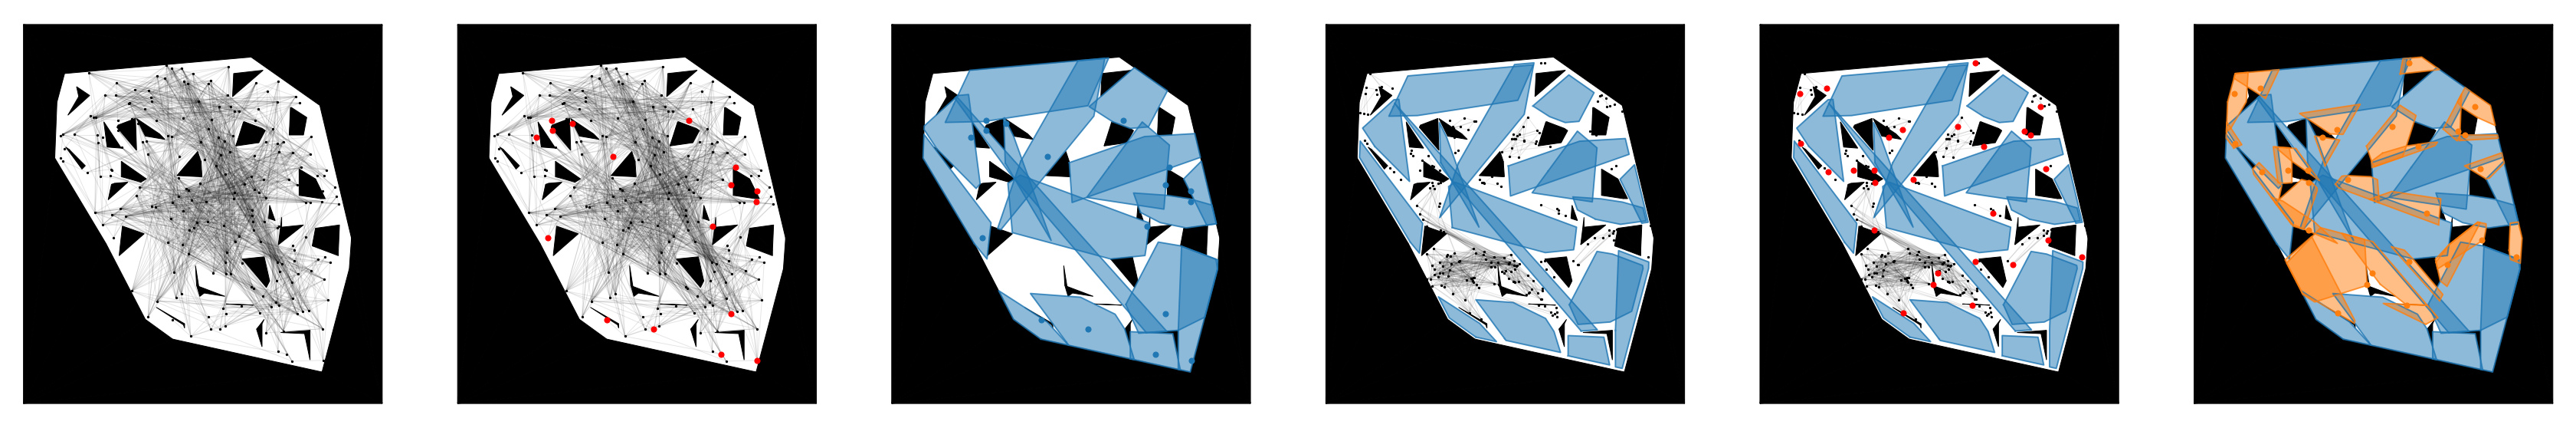

In [4]:

for i in range(len(points)):
    idxs = np.where(ad_mat[i, i:]==1)[0]+i
    for id in idxs:
        edges.append([[points[i,0], points[id,0]], [points[i,1], points[id,1]]])

for i in range(len(points2)):
    idxs = np.where(ad_mat2[i, i:]==1)[0]+i
    for id in idxs:
        edges2.append([[points2[i,0], points2[id,0]], [points2[i,1], points2[id,1]]])

fig, axs = plt.subplots(nrows=1, ncols=6, figsize = (60,10))
ax = axs[0]
world.plot_cfree(ax)
ax.scatter(points[:,0], points[:,1], s=5, c = 'k')
for e in edges[::5]:
    ax.plot(e[0], e[1], linewidth = 1, color = 'k', alpha = 0.1)
ax.axis('equal')
# Disable the axis labels
ax.set_xticklabels([])
ax.set_yticklabels([])
# Remove the axis boxes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)


ax = axs[1]
world.plot_cfree(ax)
ax.scatter(points[:,0], points[:,1], s=5, c = 'k')
for e in edges[::5]:
    ax.plot(e[0], e[1], linewidth = 1, color = 'k', alpha = 0.1)
ax.scatter(seed_points[:,0],seed_points[:,1], s=50, c = 'r', zorder=10)
ax.axis('equal')
# Disable the axis labels
ax.set_xticklabels([])
ax.set_yticklabels([])
# Remove the axis boxes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)



ax = axs[2]
world.plot_cfree(ax)
#ax.scatter(points[:,0], points[:,1], s=5, c = 'k')

for g in [region_groups[0]]:
    rnd_artist = ax.plot([0,0],[0,0], alpha = 0)
    for r in g:
        world.plot_HPoly(ax, r, color =rnd_artist[0].get_color())
# for e in edges[::5]:
#     ax.plot(e[0], e[1], linewidth = 1, color = 'k', alpha = 0.1)
ax.scatter(seed_points[:,0],seed_points[:,1], s=50, c = rnd_artist[0].get_color(), zorder=10)
ax.axis('equal')
# Disable the axis labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Remove the axis boxes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)



ax = axs[3]
world.plot_cfree(ax)
ax.scatter(points2[:,0], points2[:,1], s=5, c = 'k')

for g in [region_groups[0]]:
    rnd_artist = ax.plot([0,0],[0,0], alpha = 0)
    for r in shrink_regions(g):
        world.plot_HPoly(ax, r, color =rnd_artist[0].get_color())
for e in edges2[::5]:
    ax.plot(e[0], e[1], linewidth = 1, color = 'k', alpha = 0.1)
#ax.scatter(seed_points2[:,0],seed_points2[:,1], s=50, c = 'r', zorder=10)
ax.axis('equal')
# Disable the axis labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Remove the axis boxes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)


ax = axs[4]
world.plot_cfree(ax)
ax.scatter(points2[:,0], points2[:,1], s=5, c = 'k')

for g in [region_groups[0]]:
    rnd_artist = ax.plot([0,0],[0,0], alpha = 0)
    for r in shrink_regions(g):
        world.plot_HPoly(ax, r, color =rnd_artist[0].get_color())
for e in edges2[::5]:
    ax.plot(e[0], e[1], linewidth = 1, color = 'k', alpha = 0.1)
ax.scatter(seed_points2[:,0],seed_points2[:,1], s=50, c = 'r', zorder=10)
ax.axis('equal')
# Disable the axis labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Remove the axis boxes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)


ax = axs[5]
world.plot_cfree(ax)
#ax.scatter(points2[:,0], points2[:,1], s=5, c = 'k')

for g in region_groups:
    rnd_artist = ax.plot([0,0],[0,0], alpha = 0)
    for r in g:
        world.plot_HPoly(ax, r, color =rnd_artist[0].get_color())
# for e in edges2[::5]:
#     ax.plot(e[0], e[1], linewidth = 1, color = 'k', alpha = 0.1)
ax.scatter(seed_points2[:,0],seed_points2[:,1], s=50, c = rnd_artist[0].get_color(), zorder=10)
ax.axis('equal')
# Disable the axis labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Remove the axis boxes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)
plt.subplots_adjust(wspace=0.1)
plt.savefig('algo.pdf')

In [5]:
# bar plots
import json
res_root = "/home/peter/git/ExtensionCC_test/ExtensionCC/output"
cg_algo_data = {}
summary_jsons = os.listdir(res_root+"/summaries")
timing_files = os.listdir(res_root+"/timings")
timing_files.sort()
summary_jsons.sort()
json_names = []
for s in summary_jsons:
    if '.json' in s[-7:]:
        json_names.append(s)

timing_values = []
number_regions = []
for j in json_names:
    with open(res_root+"/summaries/"+j) as f:
        data = json.load(f)
        number_regions.append(data['results'][0]['n_polygons'])

for t in timing_files:
    with open(res_root+"/timings/"+t, 'r') as f:
        timing_values.append(float(f.read()))

In [6]:
vs_res_dirs = os.listdir("./logs")
vs_res_dirs.sort()
vs_timings = []
vs_number_regions = []
coverage = []
for d in vs_res_dirs:
    path_exp = "./logs/"+d+'/data/'
    its = os.listdir(path_exp)
    path_exp_s = "./logs/"+d+'/summary/'
    summ = os.listdir(path_exp_s)
    with open(path_exp+its[-1], 'rb') as f:
        data = pickle.load(f)
        vs_timings.append(data['ttotal'])
        n_regs = np.sum([len(r) for r in data['ra']])
        vs_number_regions.append(n_regs)
    
    with open(path_exp_s+'/'+summ[0], 'r') as file:
        lines = file.readlines()
        last_line = lines[-1].strip()  # Get the last line and remove leading/trailing whitespace

        # Split the line by whitespace and get the last element
        last_word = last_line.split()[-1]

        try:
            float_number = float(last_word)  # Convert the last word to a float
            print("Float number:", float_number)
            coverage.append(float_number)
        except ValueError:
            print("No float number found.")
    

Float number: 0.9777
Float number: 0.9436
Float number: 0.9682
Float number: 0.926
Float number: 0.9169
Float number: 0.9711
Float number: 0.9468
Float number: 0.9259
Float number: 0.962
Float number: 0.9975
Float number: 0.995
Float number: 0.9388
Float number: 0.9822
Float number: 0.9593
Float number: 0.9693
Float number: 0.9687


In [7]:
polynames = os.listdir("./data/evalexamples")
polynames.sort()
polynames = [p[:-13].replace('00','') for p in polynames]

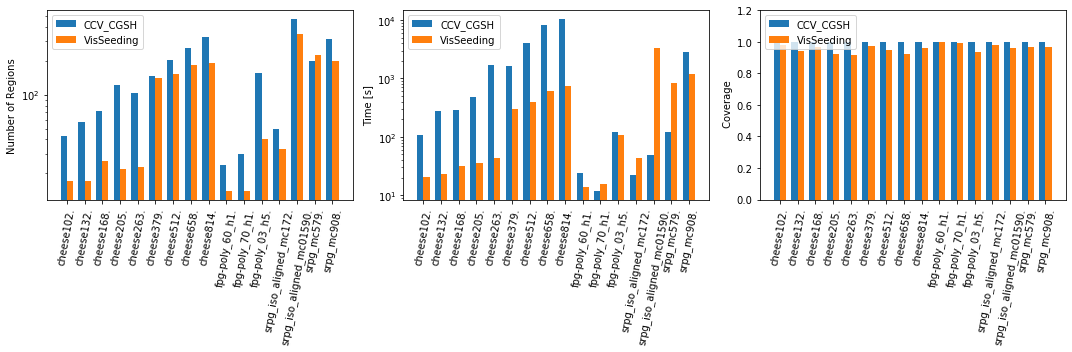

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = polynames
values1 = number_regions
values2 = vs_number_regions

# Set the position of the bars on the x-axis
ind = np.arange(len(categories))

# Set the width of the bars
width = 0.35

# Create the figure and axes
fig, axs = plt.subplots(nrows =1, ncols = 3, figsize = (15, 5))

ax = axs[0]
# Create the first set of bars
rects1 = ax.bar(ind - width/2, values1, width, label='CCV_CGSH')

# Create the second set of bars
rects2 = ax.bar(ind + width/2, values2, width, label='VisSeeding')

# Set custom tick labels
ax.set_xticks(ind)
ax.set_xticklabels(categories, rotation = 80)
ax.set_yscale('log')
# Add labels, title, and legend
ax.set_ylabel('Number of Regions')
ax.set_title('')
ax.legend()

values1 = timing_values
values2 = vs_timings
ax = axs[1]
# Create the first set of bars
rects1 = ax.bar(ind - width/2, values1, width, label='CCV_CGSH')

# Create the second set of bars
rects2 = ax.bar(ind + width/2, values2, width, label='VisSeeding')

# Set custom tick labels
ax.set_xticks(ind)
ax.set_xticklabels(categories, rotation = 80)
ax.set_yscale('log')
# Add labels, title, and legend
ax.set_ylabel('Time [s]')
ax.set_title('')
ax.legend()

values1 = [1]*16
values2 = coverage
ax = axs[2]
# Create the first set of bars
rects1 = ax.bar(ind - width/2, values1, width, label='CCV_CGSH')

# Create the second set of bars
rects2 = ax.bar(ind + width/2, values2, width, label='VisSeeding')

# Set custom tick labels
ax.set_xticks(ind)
ax.set_xticklabels(categories, rotation = 80)
ax.set_ylim([0,1.2])
# Add labels, title, and legend
ax.set_ylabel(' Coverage')
ax.set_title('')
ax.legend()
# Display the plot
plt.tight_layout()
plt.savefig('comparison.pdf')

In [45]:
ind

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [40]:
len(number_regions)

16

In [37]:
for p in polynames:
    print(p)

cheese102.
cheese132.
cheese168.
cheese205.
cheese263.
cheese379.
cheese512.
cheese658.
cheese814.
fpg-poly_0000000060_h1.
fpg-poly_0000000070_h1.
fpg-poly_0000000300_h5.
srpg_iso_aligned_mc0000172.
srpg_iso_aligned_mc0001590.
srpg_mc0000579.
srpg_mc0000908.


In [38]:
len(timing_values)

16